In [13]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
 
dataset = pd.read_csv('wheat2.csv')

#df_new['Rainfall'].value_counts()
dataset=dataset.drop(['Production'],axis=1)

dataset['fertilizer'] = (dataset['NPK']+dataset['MOP'])/2

dataset=dataset.drop(['DAP'],axis=1)
dataset=dataset.drop(['MAP'],axis=1)
dataset=dataset.drop(['MOP'],axis=1)
dataset=dataset.drop(['NPK'],axis=1)
dataset=dataset.drop(['UREA'],axis=1)
dataset=dataset.drop(['TSP'],axis=1)
dataset

,Area,Labour_hours,Rainfall,Yield,fertilizer
0,349000,183.6,649,3776.504298,0.73
1,214000,183.6,649,4028.037383,0.73
2,358000,183.6,649,4854.748603,0.73
3,361000,183.6,649,4681.440443,0.73
4,363000,183.6,649,4683.195592,0.73
...,...,...,...,...,...
2434,88904,392.9,494,2443.163412,0.67
2435,79367,392.9,494,2327.327479,0.67
2436,41115,392.9,494,2107.381734,0.67
2437,32201,392.9,494,2340.486320,0.67


In [17]:
dataset['fertilizer'].value_counts()

0.595    1275
0.670     451
0.730     338
0.460     317
1.000      58
Name: fertilizer, dtype: int64

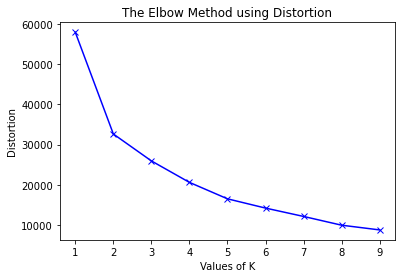

In [18]:
X=dataset.values
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

[[ 3.08546162 -2.2794386   0.97663063  0.69504317  1.14868061]
 [ 1.23526003 -2.2794386   0.97663063  0.94656848  1.14868061]
 [ 3.2088084  -2.2794386   0.97663063  1.77325416  1.14868061]
 ...
 [-1.13416295 -0.17558443 -0.48928084 -0.97402782  0.52404831]
 [-1.25633108 -0.17558443 -0.48928084 -0.74093043  0.52404831]
 [-0.94224908 -0.17558443 -0.48928084 -0.68717334  0.52404831]]


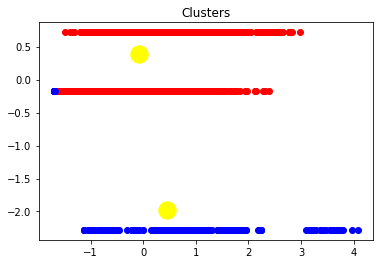

In [19]:


#scaler = StandardScaler() 
  
# To scale data 
#scaler.fit(dataset)

#X = preprocessing.scale(dataset)

#print(dataset)

#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(dataset)

scalerX = StandardScaler().fit(dataset)

X = scalerX.transform(dataset)


#X=X_scaled.values
#X=dataset.values
print(X)

#X_old = scalerX.inverse_transform(X)

#print(X_old)

# Applying k-means to the sample dataset
#k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
#Determines random number generation for centroid initialization.
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0) 
#Compute cluster centers and predict cluster index for each sample.
y_kmeans = kmeans.fit_predict(X)
dataset['Cluster'] = pd.Series(y_kmeans, index=dataset.index)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],c='red',label='A')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],c='blue',label='B')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],c='green',label='C')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3,1],c='pink',label='D')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters')

plt.show()

In [20]:
dataset
dataset['Cluster'].value_counts()

0    2043
1     396
Name: Cluster, dtype: int64

In [21]:
grouped = dataset.groupby(dataset.Cluster)

cluster0 = grouped.get_group(0)
cluster1 = grouped.get_group(1)




In [22]:
cluster0=cluster0.drop(['Cluster'],axis=1)
cluster1=cluster1.drop(['Cluster'],axis=1)
# cluster2=cluster2.drop(['Cluster'],axis=1)
# cluster3=cluster3.drop(['Cluster'],axis=1)

In [23]:
print(cluster0.max()) 
print(cluster0.min())

print(cluster1.max()) 
print(cluster1.min())

# print(cluster2.max()) 
# print(cluster2.min())

# print(cluster3.max()) 
# print(cluster3.min())

Area            341765.000000
Labour_hours       481.800000
Rainfall           617.000000
Yield             5676.161867
fertilizer           0.670000
dtype: float64
Area            1482.00000
Labour_hours     392.90000
Rainfall         494.00000
Yield            328.76158
fertilizer         0.46000
dtype: float64
Area            422000.000000
Labour_hours       392.900000
Rainfall          1094.000000
Yield             7461.538462
fertilizer           1.000000
dtype: float64
Area              2.000000
Labour_hours    183.600000
Rainfall        649.000000
Yield           223.918575
fertilizer        0.730000
dtype: float64


In [48]:
bin_area = [-1,85000,150000,450000]
bin_labour = [-1,200,400,500]
bin_rainfall = [400,500,700,1100]
bin_yield= [-1,2550,3300,8000]
bin_fertilizer=[0,0.5,0.6,1]

In [53]:
category = pd.cut(cluster0.Area,bin_area)
category = category.to_frame()
category.columns = ['range_area']
#concatenate age and its bin
df_new = pd.concat([cluster0,category],axis = 1)
df_new
category = pd.cut(cluster0.Labour_hours,bin_labour)
category = category.to_frame()
category.columns = ['range_labour']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new
category = pd.cut(cluster0.Rainfall,bin_rainfall)
category = category.to_frame()
category.columns = ['range_rainfall']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster0.Yield,bin_yield)
category = category.to_frame()
category.columns = ['range_yield']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster0.fertilizer,bin_fertilizer)
category = category.to_frame()
category.columns = ['range_fertilizer']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new


df_new=df_new.drop(['Area'],axis=1)
df_new=df_new.drop(['Labour_hours'],axis=1)
df_new=df_new.drop(['Rainfall'],axis=1)
df_new=df_new.drop(['Yield'],axis=1)
df_new=df_new.drop(['fertilizer'],axis=1)
# df_new=df_new.drop(['DAP'],axis=1)
# df_new=df_new.drop(['MAP'],axis=1)
# df_new=df_new.drop(['MOP'],axis=1)
# df_new=df_new.drop(['NPK'],axis=1)
# df_new=df_new.drop(['UREA'],axis=1)
# df_new=df_new.drop(['TSP'],axis=1)

print(df_new['range_area'].value_counts())
print(df_new['range_yield'].value_counts())

import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 


dummies1=pd.get_dummies(df_new.range_area)
dummies2=pd.get_dummies(df_new.range_labour)
dummies3=pd.get_dummies(df_new.range_rainfall)
dummies4=pd.get_dummies(df_new.range_yield)
dummies5=pd.get_dummies(df_new.range_fertilizer)

# dummies5=pd.get_dummies(df_new.range_dap)
# dummies6=pd.get_dummies(df_new.range_map)
# dummies7=pd.get_dummies(df_new.range_mop)
# dummies8=pd.get_dummies(df_new.range_npk)
# dummies9=pd.get_dummies(df_new.range_urea)
# dummies10=pd.get_dummies(df_new.range_tsp)


#merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7,dummies8,dummies9,dummies10],axis='columns')
merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5],axis='columns')
merged



#merged = merged.rename(columns={'(-1, 59963]': '(-1, 59963]_A','(59963, 153521]':'(59963, 153521]_A'})

merged=merged.drop(['range_area'],axis=1)
merged=merged.drop(['range_labour'],axis=1)
merged=merged.drop(['range_rainfall'],axis=1)
merged=merged.drop(['range_yield'],axis=1)
merged=merged.drop(['range_fertilizer'],axis=1)

# merged=merged.drop(['range_dap'],axis=1)
# merged=merged.drop(['range_map'],axis=1)
# merged=merged.drop(['range_mop'],axis=1)
# merged=merged.drop(['range_npk'],axis=1)
# merged=merged.drop(['range_urea'],axis=1)
# merged=merged.drop(['range_tsp'],axis=1)



#merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 419]_','(419, 600]_l','(600, 1000]_l','(-1, 494]_r','(494, 800]_r','(800, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.3]_dap','(0.3, 0.6]_dap','(0.6, 1.0]_dap','(0.0, 0.3]_map','(0.3, 0.6]_map','(0.6, 1.0]_map','(0.0, 0.3]_mop','(0.3, 0.6]_mop','(0.6, 1.0]_mop','(0.0, 0.3]_npk','(0.3, 0.6]_npk','(0.6, 1.0]_npk','(0.0, 0.3]_urea','(0.3, 0.6]_urea','(0.6, 1.0]_urea','(0.0, 0.3]_tsp','(0.3, 0.6]_tsp','(0.6, 1.0]_tsp']
merged.columns=['(-1, 85000]_a','(85000, 150000]_a','(150000, 450000]_a','(-1, 200]_l','(200, 400]_l','(400, 500]_l','(400, 500]_r','(500, 700]_r','(700, 1100]_r','(-1, 2550]_y','(2550, 3300]_y','(3300, 8000]_y','(0.0, 0.5]_fert','(0.5, 0.6]_fert','(0.6, 1.0]_fert']

merged


frq_items = apriori(merged, min_support = 0.2, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
#print(rules.head()) 


rules.to_csv('wheat_rules1.csv')
rules

(85000, 150000]     750
(-1, 85000]         710
(150000, 450000]    583
Name: range_area, dtype: int64
(2550, 3300]    714
(-1, 2550]      702
(3300, 8000]    627
Name: range_yield, dtype: int64


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
74,"((200, 400]_l, (400, 500]_r)","((0.6, 1.0]_fert)",0.220754,0.220754,0.220754,1.000000,4.529933,0.172022,inf
75,"((0.6, 1.0]_fert)","((200, 400]_l, (400, 500]_r)",0.220754,0.220754,0.220754,1.000000,4.529933,0.172022,inf
14,"((0.6, 1.0]_fert)","((200, 400]_l)",0.220754,0.375918,0.220754,1.000000,2.660156,0.137769,inf
73,"((0.6, 1.0]_fert, (400, 500]_r)","((200, 400]_l)",0.220754,0.375918,0.220754,1.000000,2.660156,0.137769,inf
22,"((0.5, 0.6]_fert)","((400, 500]_l)",0.624082,0.624082,0.624082,1.000000,1.602353,0.234604,inf
...,...,...,...,...,...,...,...,...,...
31,"((400, 500]_r)","((0.6, 1.0]_fert)",0.844836,0.220754,0.220754,0.261298,1.183662,0.034253,1.054885
77,"((400, 500]_r)","((0.6, 1.0]_fert, (200, 400]_l)",0.844836,0.220754,0.220754,0.261298,1.183662,0.034253,1.054885
59,"((400, 500]_r)","((150000, 450000]_a, (400, 500]_l)",0.844836,0.208517,0.208517,0.246813,1.183662,0.032354,1.050846
71,"((400, 500]_r)","((0.5, 0.6]_fert, (150000, 450000]_a)",0.844836,0.208517,0.208517,0.246813,1.183662,0.032354,1.050846


In [50]:
category = pd.cut(cluster1.Area,bin_area)
category = category.to_frame()
category.columns = ['range_area']
#concatenate age and its bin
df_new = pd.concat([cluster1,category],axis = 1)
df_new
category = pd.cut(cluster1.Labour_hours,bin_labour)
category = category.to_frame()
category.columns = ['range_labour']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new
category = pd.cut(cluster1.Rainfall,bin_rainfall)
category = category.to_frame()
category.columns = ['range_rainfall']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster1.Yield,bin_yield)
category = category.to_frame()
category.columns = ['range_yield']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster1.fertilizer,bin_fertilizer)
category = category.to_frame()
category.columns = ['range_fertilizer']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new


df_new=df_new.drop(['Area'],axis=1)
df_new=df_new.drop(['Labour_hours'],axis=1)
df_new=df_new.drop(['Rainfall'],axis=1)
df_new=df_new.drop(['Yield'],axis=1)
df_new=df_new.drop(['fertilizer'],axis=1)
# df_new=df_new.drop(['DAP'],axis=1)
# df_new=df_new.drop(['MAP'],axis=1)
# df_new=df_new.drop(['MOP'],axis=1)
# df_new=df_new.drop(['NPK'],axis=1)
# df_new=df_new.drop(['UREA'],axis=1)
# df_new=df_new.drop(['TSP'],axis=1)

print(df_new['range_area'].value_counts())
print(df_new['range_yield'].value_counts())

import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 


dummies1=pd.get_dummies(df_new.range_area)
dummies2=pd.get_dummies(df_new.range_labour)
dummies3=pd.get_dummies(df_new.range_rainfall)
dummies4=pd.get_dummies(df_new.range_yield)
dummies5=pd.get_dummies(df_new.range_fertilizer)

# dummies5=pd.get_dummies(df_new.range_dap)
# dummies6=pd.get_dummies(df_new.range_map)
# dummies7=pd.get_dummies(df_new.range_mop)
# dummies8=pd.get_dummies(df_new.range_npk)
# dummies9=pd.get_dummies(df_new.range_urea)
# dummies10=pd.get_dummies(df_new.range_tsp)


#merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7,dummies8,dummies9,dummies10],axis='columns')
merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5],axis='columns')
merged



#merged = merged.rename(columns={'(-1, 59963]': '(-1, 59963]_A','(59963, 153521]':'(59963, 153521]_A'})

merged=merged.drop(['range_area'],axis=1)
merged=merged.drop(['range_labour'],axis=1)
merged=merged.drop(['range_rainfall'],axis=1)
merged=merged.drop(['range_yield'],axis=1)
merged=merged.drop(['range_fertilizer'],axis=1)

# merged=merged.drop(['range_dap'],axis=1)
# merged=merged.drop(['range_map'],axis=1)
# merged=merged.drop(['range_mop'],axis=1)
# merged=merged.drop(['range_npk'],axis=1)
# merged=merged.drop(['range_urea'],axis=1)
# merged=merged.drop(['range_tsp'],axis=1)



#merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 419]_','(419, 600]_l','(600, 1000]_l','(-1, 494]_r','(494, 800]_r','(800, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.3]_dap','(0.3, 0.6]_dap','(0.6, 1.0]_dap','(0.0, 0.3]_map','(0.3, 0.6]_map','(0.6, 1.0]_map','(0.0, 0.3]_mop','(0.3, 0.6]_mop','(0.6, 1.0]_mop','(0.0, 0.3]_npk','(0.3, 0.6]_npk','(0.6, 1.0]_npk','(0.0, 0.3]_urea','(0.3, 0.6]_urea','(0.6, 1.0]_urea','(0.0, 0.3]_tsp','(0.3, 0.6]_tsp','(0.6, 1.0]_tsp']
merged.columns=['(-1, 85000]_a','(85000, 150000]_a','(150000, 450000]_a','(-1, 200]_l','(200, 400]_l','(400, 500]_l','(400, 500]_r','(500, 700]_r','(700, 1100]_r','(-1, 2550]_y','(2550, 3300]_y','(3300, 8000]_y','(0.0, 0.5]_fert','(0.5, 0.6]_fert','(0.6, 1.0]_fert']

merged


frq_items = apriori(merged, min_support = 0.4, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
#print(rules.head()) 


rules.to_csv('wheat_rules2.csv')
rules

(150000, 450000]    211
(-1, 85000]         113
(85000, 150000]      72
Name: range_area, dtype: int64
(3300, 8000]    336
(-1, 2550]       58
(2550, 3300]      2
Name: range_yield, dtype: int64


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,"((150000, 450000]_a)","((3300, 8000]_y)",0.532828,0.848485,0.532828,1.000000,1.178571,0.080732,inf
26,"((-1, 200]_l, (150000, 450000]_a)","((3300, 8000]_y)",0.532828,0.848485,0.532828,1.000000,1.178571,0.080732,inf
29,"((150000, 450000]_a)","((-1, 200]_l, (3300, 8000]_y)",0.532828,0.848485,0.532828,1.000000,1.178571,0.080732,inf
38,"((500, 700]_r, (150000, 450000]_a)","((3300, 8000]_y)",0.532828,0.848485,0.532828,1.000000,1.178571,0.080732,inf
42,"((150000, 450000]_a)","((500, 700]_r, (3300, 8000]_y)",0.532828,0.848485,0.532828,1.000000,1.178571,0.080732,inf
...,...,...,...,...,...,...,...,...,...
53,"((0.6, 1.0]_fert)","((150000, 450000]_a, (3300, 8000]_y)",1.000000,0.532828,0.532828,0.532828,1.000000,0.000000,1.0
106,"((0.6, 1.0]_fert)","((150000, 450000]_a, (500, 700]_r, (-1, 200]_l)",1.000000,0.532828,0.532828,0.532828,1.000000,0.000000,1.0
120,"((0.6, 1.0]_fert)","((-1, 200]_l, (150000, 450000]_a, (3300, 8000]_y)",1.000000,0.532828,0.532828,0.532828,1.000000,0.000000,1.0
133,"((0.6, 1.0]_fert)","((500, 700]_r, (150000, 450000]_a, (3300, 8000...",1.000000,0.532828,0.532828,0.532828,1.000000,0.000000,1.0
